# Benford law comparision

To compare the capabilities of Azure Anomaly Detecction service, the Benford Law were used as benchmark in some datasets.

This data comes from:

https://www.kaggle.com/jaganadhg/house-hold-energy-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\ihfreitas\AppData\Local\Continuum\anaconda3\envs\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df=pd.read_csv("D202.csv")

In [6]:
df["DATE"]=pd.to_datetime(df["DATE"],format="%m/%d/%Y")

In [8]:
df["VALUE"]=df['COST'].str.replace("$","",regex=False).astype(float)

In [53]:
df.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES,VALUE,VALUES_FIRST_DIGIT
0,Electric usage,2016-10-22,0:00,0:14,0.01,kWh,$0.00,NaN,0.0,
1,Electric usage,2016-10-22,0:15,0:29,0.01,kWh,$0.00,NaN,0.0,
2,Electric usage,2016-10-22,0:30,0:44,0.01,kWh,$0.00,NaN,0.0,
3,Electric usage,2016-10-22,0:45,0:59,0.01,kWh,$0.00,NaN,0.0,
4,Electric usage,2016-10-22,1:00,1:14,0.01,kWh,$0.00,NaN,0.0,


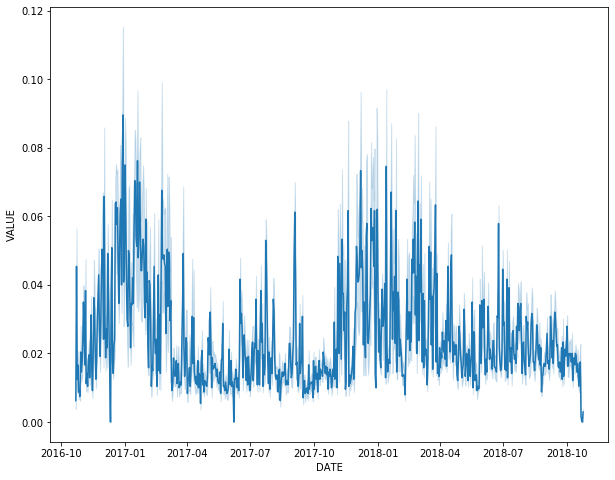

In [10]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,8))
sns.lineplot(x="DATE",y="VALUE",data=df)

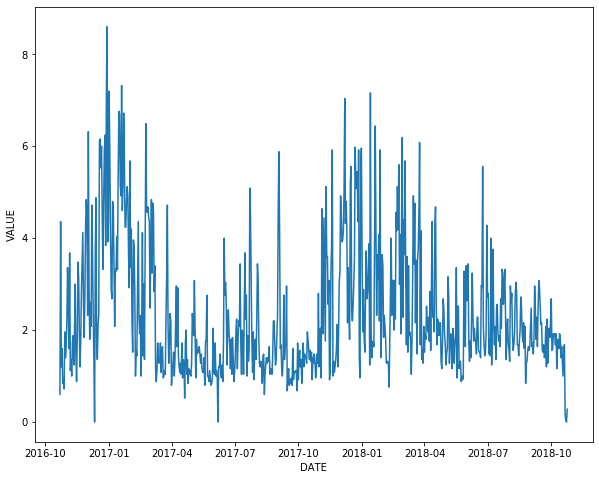

In [12]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,8))
sns.lineplot(x="DATE",y="VALUE",data=df.groupby("DATE").agg({"VALUE":np.sum}).reset_index())

Extracting features and applying rules

In [23]:
df["VALUES_FIRST_DIGIT"]=df["VALUE"].astype(str).str.replace("0.0","",regex=False).str.slice(0,1)

In [31]:
benford_law=df.groupby("VALUES_FIRST_DIGIT")["DATE"].count().reset_index()

In [34]:
benford_law.rename(columns={"DATE":"N_OCORRENCIAS_VERIFICADAS"},inplace=True)

In [43]:
benford_law.drop(benford_law[(benford_law["VALUES_FIRST_DIGIT"]=="")|
                            (benford_law["VALUES_FIRST_DIGIT"]=="0")].index,inplace=True)
benford_law["%_OCORRENCIAS_VERIFICADAS"]=benford_law["N_OCORRENCIAS_VERIFICADAS"]\
                                        /benford_law["N_OCORRENCIAS_VERIFICADAS"].sum()*100

In [47]:
benford_law["%_OCORRECIAS_ESPERADAS"]=[30.1,17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6]

In [48]:
benford_law

,VALUES_FIRST_DIGIT,N_OCORRENCIAS_VERIFICADAS,%_OCORRENCIAS_VERIFICADAS,%_OCORRECIAS_ESPERADAS
2,1,30204,55.624309,30.1
3,2,9806,18.058932,17.6
4,3,4126,7.598527,12.5
5,4,2608,4.802947,9.7
6,5,1848,3.403315,7.9
7,6,2074,3.819521,6.7
8,7,1580,2.909761,5.8
9,8,1294,2.383057,5.1
10,9,760,1.399632,4.6


Visualizing results

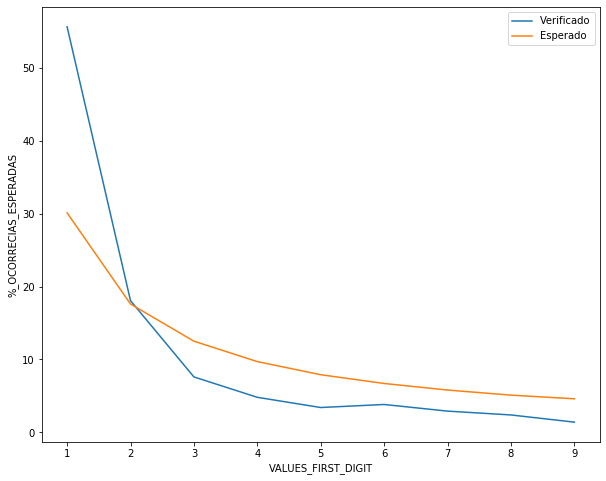

In [52]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,8))
sns.lineplot(x="VALUES_FIRST_DIGIT",y="%_OCORRENCIAS_VERIFICADAS",data=benford_law,label="Verificado")
sns.lineplot(x="VALUES_FIRST_DIGIT",y="%_OCORRECIAS_ESPERADAS",data=benford_law,label="Esperado")
plt.legend()

### Conclusion

We see that for this dataset, we have a high percentual of numbers beginning with 1, which might point an anomaly and guide a business expert. Nevertheless it is not possible to validate this ideia due the lack of knowledge about household electricity consumption.